## Battery kinetics and transport

- Thermodynamics tells us what's possible, i.e. the equilibrium states when the battery is fully at rest. The electrochemical stability window is the voltage range within which the electrolyte should not decomposite (either via reduction or oxidation). 

- Kinetics give us information about rates of reactions, desired or undesired. 

- In ideality, we want lithium ions to move back and forth with 100% efficiency. In reality, some lithium ions are consumed and reacted away, especially considering that we are operating in a thermodynamically unstable environment. So, it's remarkable that lithium-ion batteries work as well as they do. Commercial cells can cycle at efficiencies of 99.995% or higher. $0.99995^{4000}\ =\ 81.9\%$ of initial capacity, and can operate at high voltages beyond the electrochemical stability window. This is largely thanks to kinetics - of SEI formation (which we will discuss in Session 4). 

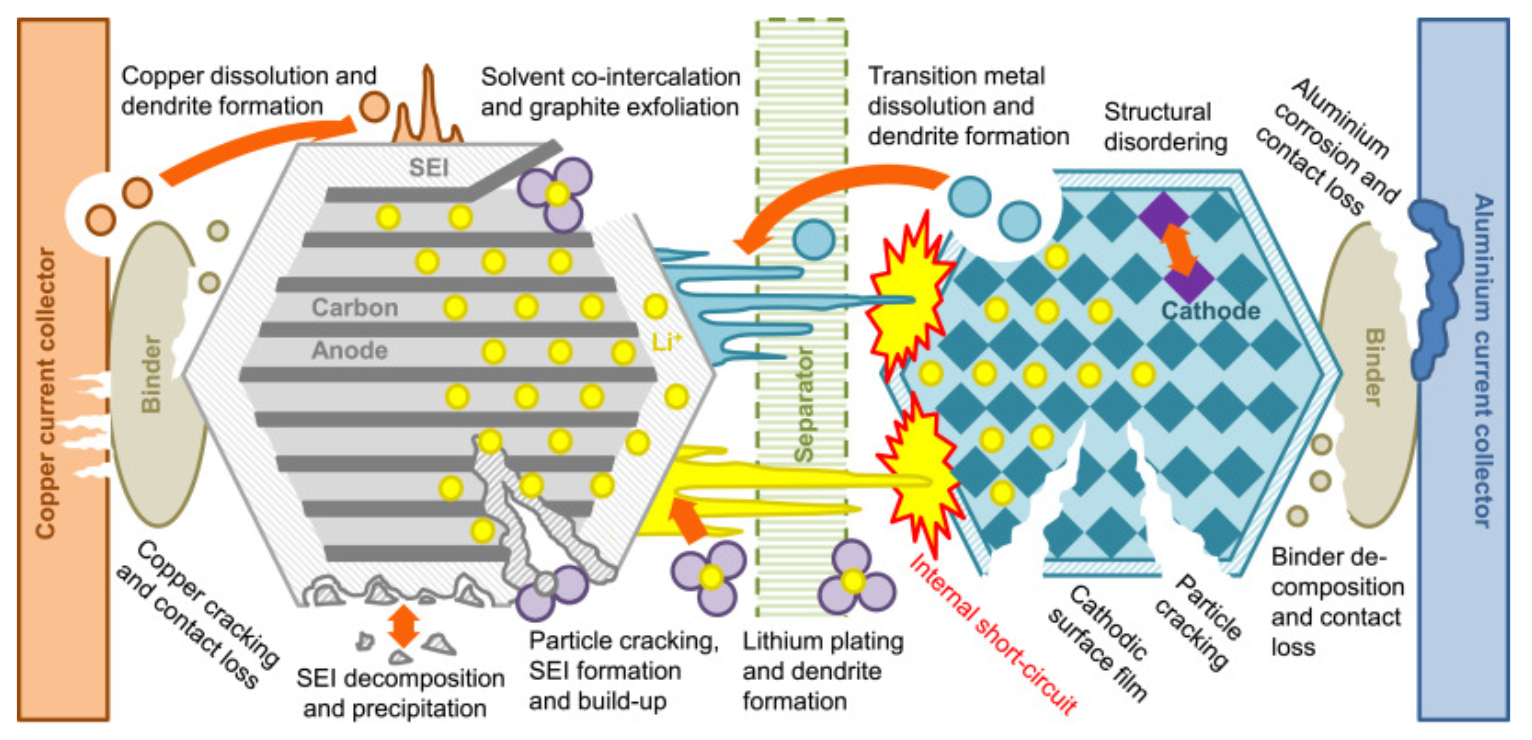

[ref: doi.org/10.1016/j.jpowsour.2016.12.011]

- Going back to kinetic theory: the Arrhenius rate law is an exponential relationship that describes the rate of a chemical reaction. 

$r\ =\ k_{forward}c_0 = k_0 c_0 e^{-E_A / RT}$

where $E_A$ is the activation energy. 

- This describes the transition from a reactant to a product over an intermediate state. 

- The net rate of reaction is equal to the forward and backward reactions; in other words, ions or atoms will tend to hop back and forth, but predominantly in the direction that is kinetically favorable. 

- Activation energies can be different for forward and backward reactions. 


### Butler-Volmer kinetics

Remember that current density is synonymous with rate of reaction: $j_{a}\ =\ Fc_{O}k/A$ 

As shown above, the rate of reaction is a function of the activation energy. Plugging this in:

$j_{a}\ =\ Fc_{R}k_0 e^{\alpha _a FE/RT}/A$

$j_{c}\ =\ -Fc_{O}k_0 e^{-\alpha _c FE/RT}/A$

$j_{net}\ =\ j_{a}\ +\ j_{c}$

$j = j_0(e^{\alpha _a F \eta / RT} - e^{-\alpha _c F \eta/RT})/A$

$j_0$ is the exchange current density (current at electrode surface at equilibrium), where 
$j_0\ =\ Fk_0 c_{O} e^{-\alpha _c FE_{rxn}/RT}/A$

- The exchange current is a kind of "idle current" for charge exchange across the interface, and determines a system's ability to deliver a net current. A large exchange current density means that even a low applied overpotential leads to a significant increase in measured current. 

$\alpha$ is the symmetry of the energy barrier (can be different for the anodic and cathodic reactions)

- We can plot this equation to see how the overpotential changes with applied current. 

- The difference between the cell potential when current is flowing and the equilibrium potential, is the overpotential ($\eta$). The overpotential is the energy required to drive an electrochemical reaction away from equilibrium. It is a combination of activation (or kinetic), ohmic, and mass transport contributions. Each electrode has its own overpotential contribution. 

### Activation overpotential

At small overpotentials, activation overpotential dominates (this expression is found by a Taylor expression of BV)

$j = -j_0F\eta/RT$

$R_{ct} = -\eta/j = RT/j_0F$


### Ohmic overpotential

at moderate overpotentials, there is a linear relationship.

$\eta = jR_{ohmic}$


### Mass transport overpotential

at large reductive overpotentials the anodic term of BV drops out:

$j = -j_0 e^{\alpha _c F\eta / RT}$

**all of this describes the electrode/electrolyte interface of *one* electrode. For example, the graphite electrode, or the NMC electrode. An actual battery consists of both electrodes within one electrochemical cell. 





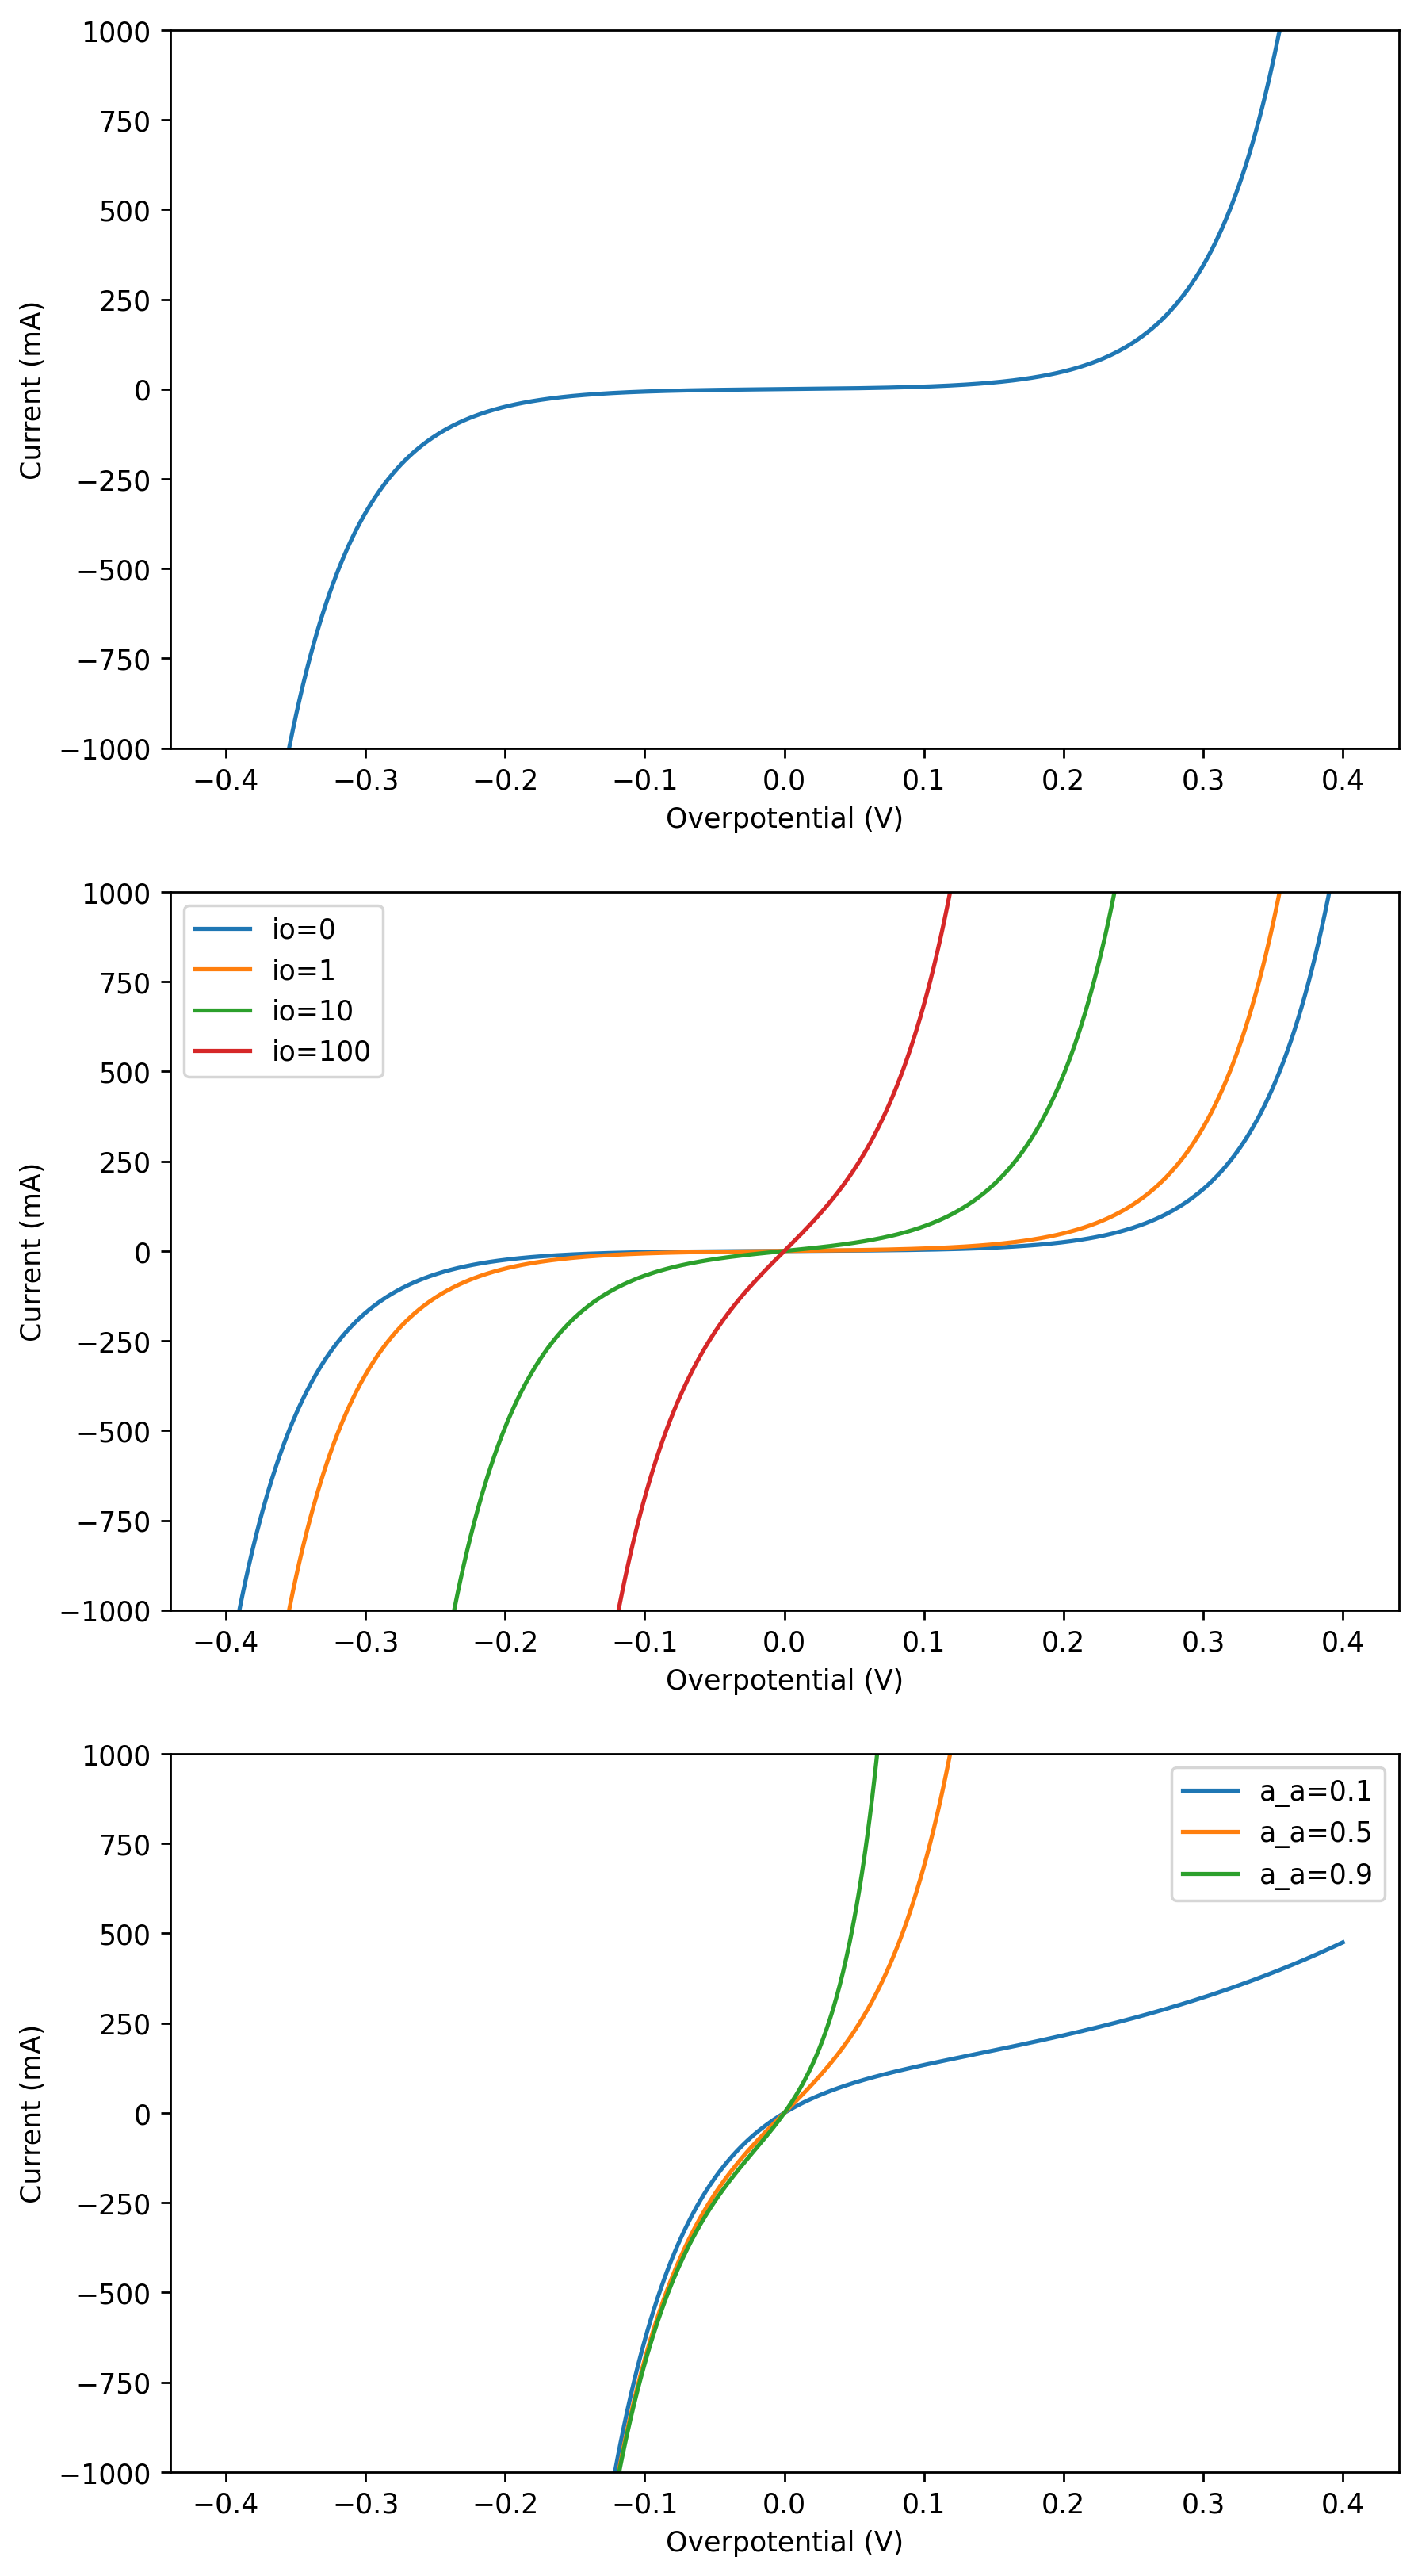

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

F = 96485 # Faradays Constant, C/mol
R = 8.314 # Ideal Gas Constant, J/mol-K

#Butler-Volmer Relationship
def BV(eta_s, T=298.0, aa=.5, ac=.5, io=1):
    anodic = np.exp((aa)*F*eta_s/(R*T))
    cathodic = np.exp((-ac)*F*eta_s/(R*T))
    return io*(anodic-cathodic)

fig = plt.figure(figsize=(8, 16), dpi=250)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

eta = np.linspace(-.4,.4,1000) # Voltage to "sweep"
ax1.plot(eta, BV(eta)) # Plot Potential vs. Current 

aa = 0.5 
ac = 0.5
i0 = [0.5, 1, 10, 100]

for i in i0:
    ax2.plot(eta,BV(eta,aa=aa,ac=ac,io=i),label="io=%.0f"%(i))
ax2.legend()

aa = [0.1, 0.5, 0.9]
for a in aa:
    ax3.plot(eta,BV(eta,aa=a,ac=ac,io=i),label="a_a=%.1f"%(a))
ax3.legend()

for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('Overpotential (V)')
    ax.set_ylabel('Current (mA)')
    ax.set_ylim(-1000,1000)

plt.show()


### Connection to Li-ion battery charge and discharge

The figure below depicts one charge and discharge cycle, showing the measured cell voltage (dashed lines) versus the approximate open circuit voltage (solid lines).

- The measured cell voltage is the *difference* between the positive and the negative electrodes. The potentials of each electrode cannot be directly distinguished without the use of a reference electrode

- The measured cell voltage is higher than the OCV during charge because of positive overpotentials. Recall this overpotential is going to be a sum of the anode and cathode overpotentials. Each anode and cathode overpotential is then a combination of kinetic, ohmic and mass transport overpotentials. This overpotential in Li-ion batteries is predominantly from high internal cell resistance (electrolytes, interphases, electrode/current collector contact, electrode/electrolyte contact)

- Over many cycles, the measured cell voltage will creep up because of increase in overpotential. What can cause this? See first figure: particle cracking, SEI decomposition and continuous electrolyte degradation, contact loss (for the anode), and transition metal dissolution, particle cracking and structural disorder leading to possible gas formation (for the cathode). In the case of an internal short circuit, a drop in the cell voltage would instead be detected due to lower internal cell resistance.  

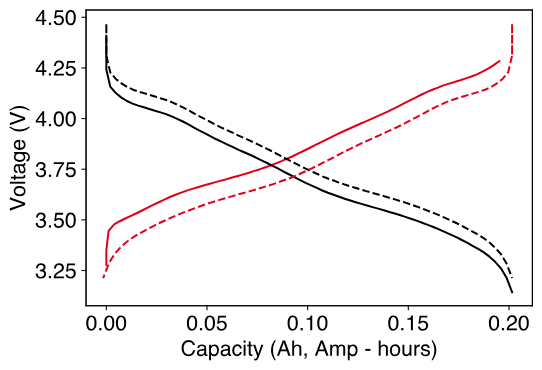

## Transport

### Diffusion coefficient

Diffusion of ions occurs in various ways: within primary particles and from one primary particle to another, from one secondary particle to another, in the liquid. The liquid-phase diffusion results in a concentration gradient in the "diffuse" layer. Any experimental way to measure diffusivity (i.e. galvanostatic intermittent titration technique) is usually the "effective" average of all these mechanisms. [Session 8]

### Transference number

The fraction of current carried by the cation relative to the anion in the electrolyte is called the transference number. Higher cation transference numbers implies that more of the current is carried by the cation. 

$t_j\ =\ i_j/i$ where $i_j\ =\ |z_j|FAu_jC_j \frac{\partial \phi}{\partial x}$ for species j. The current in the bulk solution is mainly driven by migration due to the electric field (concentration gradients are small)

- Measurable via the Bruce-Vincent method, or the Hittorf method, or NMR (nuclear magnetic resonance spectroscopy)

### Ionic conductivity

The ionic conductivity determines the electrolyte's ability to transport ions, and is a function of ionic charge, salt concentration, temperature, diffusion coefficients, etc. 

- Can be measured via EIS [Ref: https://lithiuminventory.com/experimental-electrochemistry/eis/principles/]

- Typical ionic conductivity value of a Li-ion battery electrolyte is around 10 mS/cm (milliSiemens per centimeter) at room temperature, and at an electrolyte salt concentration of 1.2 M. Higher or lower salt concentrations decrease the ionic conductivity, as does decrease in temperature. 

### Transport in solid electrodes

The solid electrodes in Li-ion  batteries are porous composites which have a defined porosity and tortuosity. 

- Porosity is the volume fraction of pores (empty spaces): total volume - volume occupied by solid phase / total volume

- Tortuosity is the "tortuous" path traversed by ions through the porous electrode (versus a straight line path)

- A typical expression used to characterize porosity and tortuosity of porous electrodes is: $D_{eff}\ =\ \frac{\epsilon}{\tau}D$ where $\epsilon$ is porosity and $\tau$ tortuosity. Effective diffusivity is that measured of the porous electrode soaked in electrolyte. 

- It is then common practice to assume Bruggeman's relationship for porous media with spherical particles: $\tau\ =\ \epsilon ^{-0.5}$ though this has been shown to grossly underestimate the tortuosity of real battery electrodes

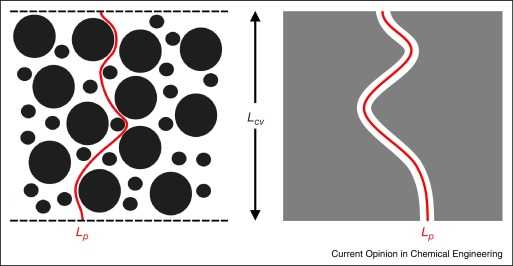

[Ref: https://www.sciencedirect.com/science/article/pii/S2211339816300119]

- Commonly measured values of tortuosity for Li-ion battery electrodes range between 3 - 9 

[Ref: doi.org/10.1149/2.062302jes]

### Estimating porosity using X-ray CT

One way of measuring electrode porosity is via image reconstruction from X-ray CT. X-ray CT scans provide 2D slices of the 3D volume. In each 2D slice, we observe active materials and the inactive materials, which have differences in X-ray absorption intensity. By comparing the pixel greyscale values, we can segment the image into pixels that are part of the active material, and pixels that are not. From this ratio, we can determine the porosity, or the pore volume fraction. This technique does have limitations - very small pores that are close to the size of the pixel resolution cannot be easily distingished, and may result in noise / error. The segmentation parameters may also depend on how the user implements the protocol. 

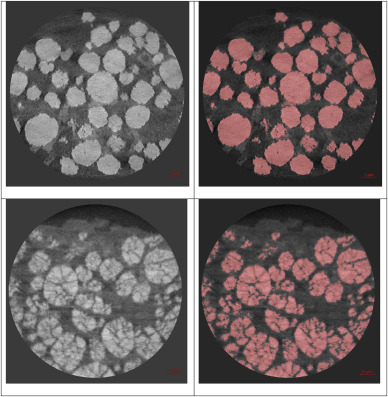

### P2D Model

Pseudo 2D model: Also known as the Doyle-Fuller-Newman (DFN) model, which is an electrochemical model based off of J. Newman's porous electrode theory. It is a physics-based model with many coupled non-linear partial differential equations, taking into account parameters such as electrolyte concentration, electrode active material concentration, initial conditions. 

PyBAMM is a modern day implementation: https://colab.research.google.com/github/pybamm-team/PyBaMM/blob/main/docs/source/examples/notebooks/models/rate-capability.ipynb#scrollTo=8TTECYy3Th-7

Li-ion battery charging rates are limited by how fast lithium ions can move through the electrolyte and the electrodes. During fast charging rates, there can be significant spatial heterogeneities that arise. Concentration gradients lead to the graphite electrode surface being more lithiated than the other side of the electrode. Even within particles there can be multiple phases that co-exist. 

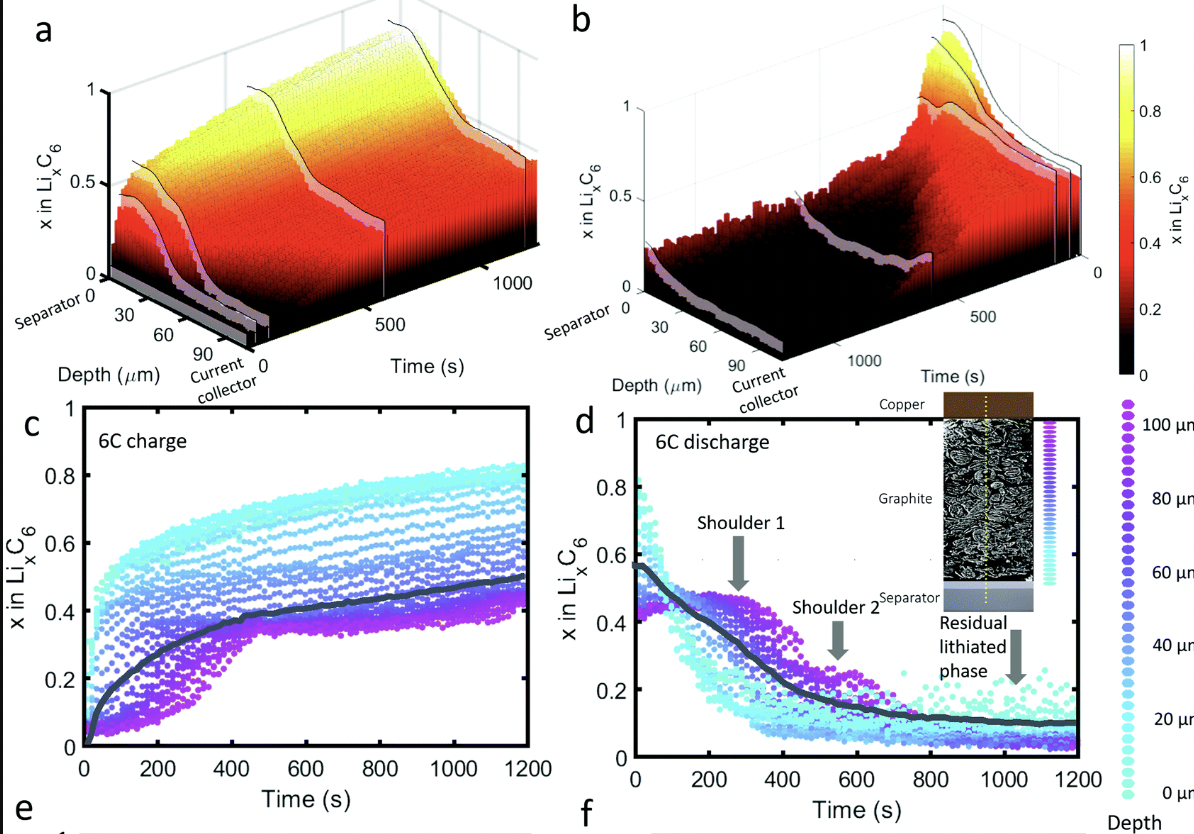

[ref: https://pubs.rsc.org/en/content/articlehtml/2020/ee/d0ee01191f]